## IIR filters 


**Introduction**

These are the most efficient type of filter to implement in DSP are usually provided as "biquad" filters.The amount of processing that is required to compute a biquad is relatively small. This is what enables the low-cost miniDSP products to implement a full active crossover  on all input and output channels. The  processor on each board can compute a certain number of biquads and this is the primary thing which indicates how many filters are available .Digital filters with an Infinite-duration Impulse Response (IIR) have characteristics that make them useful in many applications. 

The feedback which is  necessary in an implementation hence  Infinite Impulse Response (IIR) filter is also called a recursive filter and also called as  autoregressive moving-average filter (ARMA).The IIR filter has a rational transfer function. The transfer function being a ratio of polynomials means it has finite poles as well as zeros and the frequency-domain design problem becomes a rational-function approximation problem in contrast to the polynomial approximation for the FIR filte


**IIR Filter Basics**
 
IIR filters are one of two primary types of digital filters used in Digital Signal Processing (DSP) applications . “IIR” means “Infinite Impulse Response.”In IIR filter , we have recursion. We not only have the past inputs a weighted combination of those but we also have a weighted combination of the past outputs and this is where one gets the infinite nature of the impulse response because these recursions where present value of y depends on past. Sizable It will last in theory forever terms of the impulse response. The impulse response is “infinite” because there is feedback in the filter. if you put in an impulse ie. a single “1” sample followed by many “0” samples, an infinite number of non-zero values will come out.
IIR filters can achieve a given filtering characteristic using less memory and calculations than a similar FIR filter.


 **Design  Process and conditions for (IIR) filter**
 
 
 The filter design process:- 

- **STEP 1** : Specifications and requirements of the desirable IIR filter. A type of reference analog prototype filter to be used is specified according to the specifications and after that everything is ready for analog prototype filter design.

- **STEP 2** : Scaling of the frequency range of analog prototype filter into desirable frequency range. This is how an analog prototype filter is converted into an analog filter.After the analog filter is designed

- **STEP 3** : Conversion from analog to digital filter. The most popular and most commonly used converting method is bilinear transformation method. The resulting filter, obtained in this way, is always stable. However, instability of the resulting filter, when bilinear transformation is used, may be caused only by the finite word-length side-effect.

*Some design Conditions for good filter design*

- The transfer function (H(z)) should be a rational function of z, and the coefficients of z should be real.
- The poles (values, where the denominator turns 0 / output is infinite) should lie inside the unit circle of the z-plane.
- The number of zeros should be less than or equal to the number of poles.
- For the effective conversion from an analog filter to a digital one, the imaginary axis of the s-plane should map into the unit circle of the z-plane. This establishes a direct relationship between the analog frequency and digital frequency in two domains.
- The left half of the s-plane should map into the inside of the unit circle of the z-plane.


**Advantages of an IIR filter**

1. IIR filters are more versatile.
2. They are computationally easier to implement.
3. They are cheaper too.
4. The infinite response of the IIR filter is a cool feature when you are looking for amplification of signals. Not so much when you wish to attenuate them, though.

**Disadvantages of an IIR filter**

1. Practically realizable digital IIR filters do not have a linear phase response. The linear phase is a property where the phase response of a filter is a linear function of the frequency.
2. IIR filters cannot implement integer math, which is an easy to use mathematical representation because it’s cheap, fast, and easy to implement

3. They are more susceptible to problems of finite-length arithmetic, such as noise generated by calculations, and limit cycles.  

4. when the output isn’t computed perfectly and is fed back, the imperfection can compound.
5. They are harder (slower) to implement using fixed-point arithmetic.
6. They don’t offer the computational advantages of FIR filters for multirate (decimation and interpolation) applications.


**Attributes of the different IIR filter methods:**

- **Butterworth** – Flat response in both the pass and stop band, but has a wide transition zone. First described by British physicist Stephen Butterworth in 1930.

- **Inverse Chebyshev** – Flat in the pass band, with a narrower transition width than the Butterworth filter, but has ripple in the stop band. If ripple in the stop band is not a problem, might be preferred for a given application over the Butterworth filter.

- **Chebyshev** – Can have ripple in pass band, but has steeper rolloff than Inverse Chebyshev.

- **Cauer** – Narrowest transition zone. Ripple in both stop and pass bands. Sometimes called an Elliptic filter.

- Bessel – Sloping amplitude in both the pass and stop band, with a very wide transition zone. The delay versus frequency in the filter is the flattest in this list. The Bessel filter was named for Freidrich Bessel (1784-1846), a German mathematician



#### IIR filter example code to find the frequency response (Chebyshev) 


We are going to compute the frequency response of a type 1 chebyshev filter.  Let us start by importing the signals module from scipy and also matplotlib for plotting . So I'm going to import from scipy.signal . functions used in this are the  freqs, iirfilter. So in order to get a filter coefficient, we need to create filter and we're going to use this function.The first argument is the number of tabs for the filter. We can't afford the iir filter function argument is the 

  the pass band and stop band or the cutoff frequency by default should be selected. The IIR filter function gives a bandpass filter. So the critical frequency takes two frequencies as argument so we can pass one to 10 Hertz here as the critical frequency meaning frequencies between 1 to 10 has we want to pass through want to attenuate a everything else . Third parameter is the amount of ripples We want in the pass band. This fourth parameter is the amount of attenuation required. 


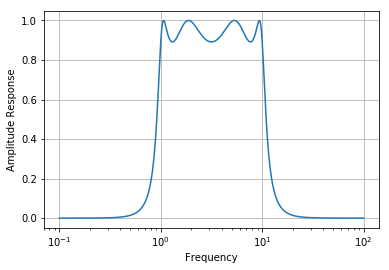

In [4]:
from scipy.signal import freqs, iirfilter
from matplotlib import pyplot as plt
import numpy as np


#band pass filter design of cheby1 
b,a = iirfilter(4,[1,10],1,60, analog =True,ftype='cheby1')

w,h= freqs(b,a, worN=np.logspace(-1,2,1000))

plt.semilogx(w,abs(h))
plt.xlabel('Frequency')
plt.ylabel('Amplitude Response')
plt.grid()
plt.show()


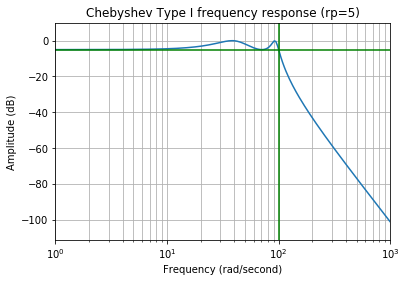

In [3]:
from scipy import signal
from matplotlib import pyplot as plt
from matplotlib import style
import numpy as np

#low pass filter design parameters ( until 100hz)
b,a = signal.cheby1(4,5,100,'low',analog=True)
w,h = signal.freqs(b,a)

#style.use('dark_background')

plt.plot(w,20*np.log10(abs(h)))
plt.xscale('log')
plt.title("Chebyshev Type I frequency response (rp=5)")
plt.xlabel("Frequency (rad/second)")
plt.ylabel("Amplitude (dB)")
plt.margins(0,0.1)
plt.grid(which='both', axis='both')
plt.axvline(100,color='green')
plt.axhline(-5,color='green')
plt.show()


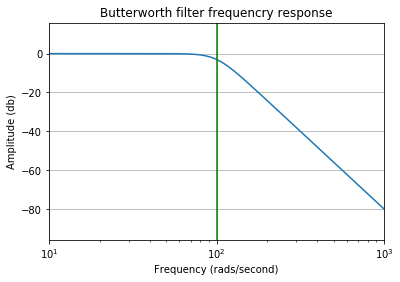

In [1]:
from scipy import signal
from matplotlib import pyplot as plt
import numpy as np


b,a= signal.butter(4,100,'low',analog=True)
w,h = signal.freqs(b,a)

plt.plot(w,20*np.log10(abs(h)))
plt.xscale('log')

plt.title('Butterworth filter frequencry response')
plt.xlabel('Frequency (rads/second)')
plt.ylabel('Amplitude (db)')
plt.margins(0,0.2)
plt.grid()
plt.axvline(100,color='green')
plt.show()


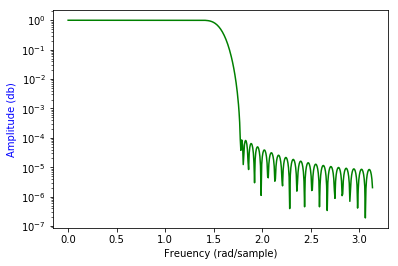

In [2]:
from scipy import signal
from matplotlib import pyplot as plt
import numpy as np

b = signal.firwin(80,0.5, window=('kaiser',8))
w,h =signal.freqz(b)
plt.semilogy(w,np.abs(h),'g')
plt.ylabel('Amplitude (db)',color='b')
plt.xlabel('Freuency (rad/sample)')
plt.show()


--- 


##### ButerWorth Filter


 Butterworth filter which we are implementing using IIR technique. So here I will be importing the Sci-Fi library and numpy which is also Implement that so here I have defined two different functions called butter_bandpass which gives the filter co-efficients . butter_bandpass_filter where I will be passing the necessary arguments for my required design. The first function would provide me the filter coefficients required and it would return the numerator and the denominator of the design filter. Once I get those values then I would be using the butter band pass filter to do the same. So now let us define various parameters associated with the word filter. I will be taking the  frequency as 5000 Hertz and lower cutoff frequency of 500 an upper cut off frequency of thousand two hundred and fifty so Whatever frequency signals which are in between those two would be passed and everything else should be rejected. So to depict the frequency responses of various orders, I would be using 3 5 6 9. to show graphicaaly how does order matter for frequency response of a signal 

we'll take four different signals and mix it together to form of final signal then we'll be passing that particular signal into our filter such that we would be In a position to filter out the only the necessary signals once we are done with it would be plotting the final results as you can see in the output now. We have a noisy signal donated by the blue arrow Mark and a filtered signal of a 600 kilo Hertz. So when I pass this particular mix it signal through this band pass filter, it has filtered out the required elements of the signal which is the frequency lying between 2250 and 600.


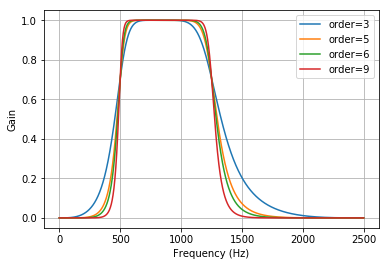

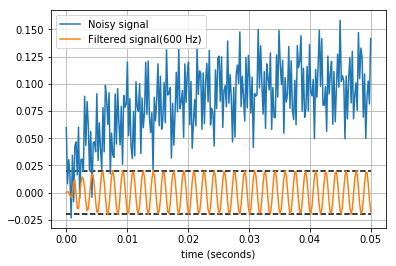

In [12]:
from scipy.signal import butter, lfilter, freqz
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style



# This function will return the numerator and denominator of the designed filter(b/a) 
def butter_bandpass(lowcut, highcut, fs, order =5):
    nyq = 0.5*fs
    low = lowcut/nyq
    high = highcut/nyq
    b,a = butter(order,[low,high],btype='band')
    return b,a

def butter_bandpass_filter(data, lowcut,highcut, fs ,order=5):
    b, a = butter_bandpass(lowcut,highcut,fs, order=order)
    y = lfilter(b,a,data)
    return y


# now let us define the various parameters associated with butterworth filter
fs = 5000

#lower cut off frquencay 
lowcut =500

#Upper cut off frequency 
highcut =1250

plt.figure(1)

for order in [3,5,6,9]:
    b,a = butter_bandpass(lowcut,highcut,fs, order =order)
    w,h = freqz(b,a,worN=2000)
    plt.plot((fs*0.5/np.pi)*w, abs(h),label ='order=%d'%order )

plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid()
plt.legend(loc='best')

    #Test Filter

T =0.05
nsamples = T*fs
t = np.linspace(0,T,nsamples)
a = 0.02
f0 = 600

x1 = 0.1*np.sin(2*np.pi*1.2*np.sqrt(t))
x2 = 0.01*np.cos(2*np.pi*312*t+0.1)
x3 = a*np.cos(2*np.pi*f0*t+.11)
x4 = 0.03*np.cos(2*np.pi*2000*t)

x = x1+x2+x3+x4
plt.figure(2)
plt.plot(t,x, label='Noisy signal')

y = butter_bandpass_filter(x,lowcut,highcut,fs,order=6)
plt.plot(t,y,label ='Filtered signal(%g Hz)'% f0)
plt.xlabel('time (seconds)')
plt.hlines([-a,a],0,T,linestyles='--')
plt.grid()
plt.axis('tight')
plt.legend(loc='upper left')
plt.show()
    
